<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/25_1_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DCGAN (Deep Convolutional Generative Adversarial Network)
을 만들어봅시다

https://www.tensorflow.org/tutorials/generative/dcgan

https://gluon.mxnet.io/_images/dcgan.png

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255 - 0.5
x_test = x_test.astype('float32') / 255 - 0.5

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
noise_dim = 100
generator = tf.keras.Sequential([                                       
    layers.Dense(7*7*128, input_shape=(noise_dim,)),
    layers.Reshape((7, 7, 128)),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='selu'),
    layers.BatchNormalization(),    
    layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')
])

생성자는 처음에는 랜덤 이미지를 만듭니다

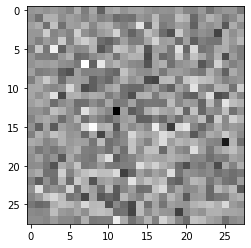

In [4]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [7]:
discriminator = tf.keras.Sequential([
    layers.Conv2D(64, kernel_size=5, strides=2, padding='same',input_shape=[28, 28, 1], activation = layers.LeakyReLU(0.2)),    
    layers.Dropout(0.4),

    layers.Conv2D(128, kernel_size=5, strides=2, padding='same',activation = layers.LeakyReLU(0.2)),    
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')                              
])

In [8]:
dcgan = models.Sequential([generator, discriminator])

In [9]:
dcgan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 1,053,186
Non-trainable params: 384
_________________________________________________________________


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = np.expand_dims(x_train, 3)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test = np.expand_dims(x_test,3)

generator와 discriminator를 따로 훈련시켜야 하므로 fit() 함수로 훈련할 수 없습니다

In [14]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
dcgan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [15]:
batch_size=32
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)
dataset = dataset.batch(batch_size)

epoch:  0


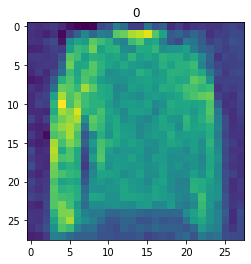

epoch:  1


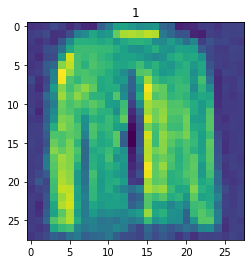

epoch:  2


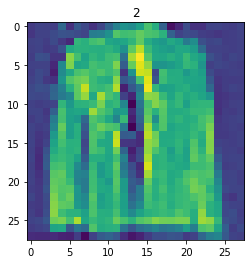

epoch:  3


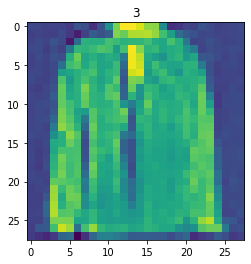

epoch:  4


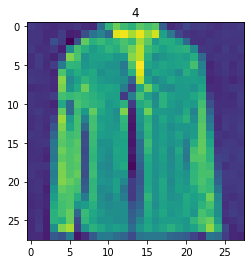

epoch:  5


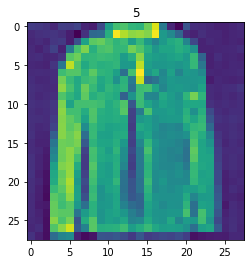

epoch:  6


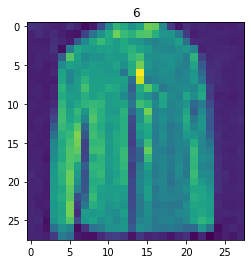

epoch:  7


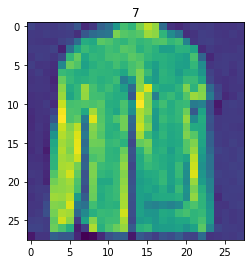

epoch:  8


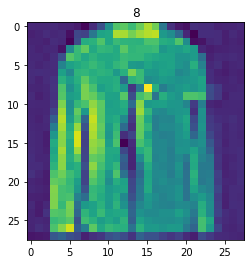

epoch:  9


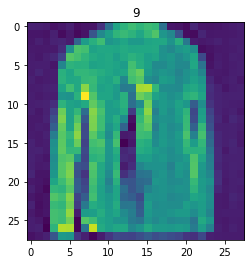

epoch:  10


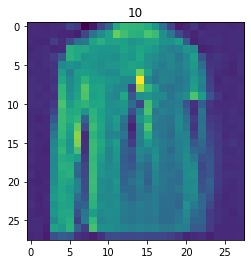

epoch:  11


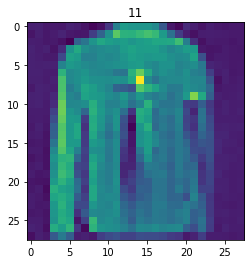

epoch:  12


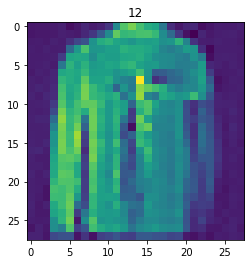

epoch:  13


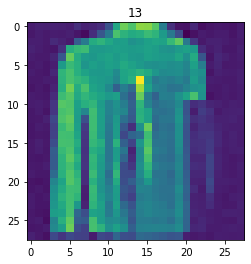

epoch:  14


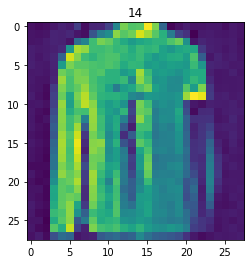

epoch:  15


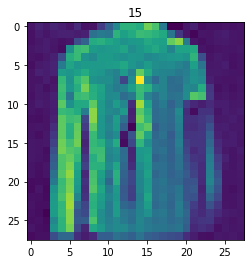

epoch:  16


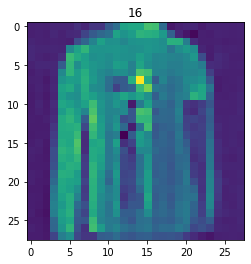

epoch:  17


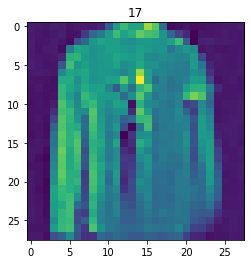

epoch:  18


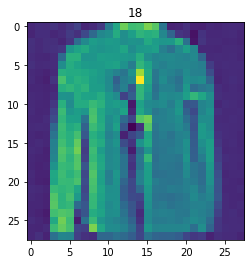

epoch:  19


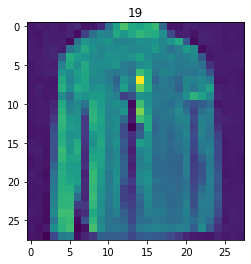

epoch:  20


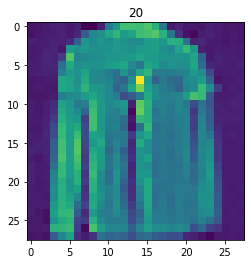

epoch:  21


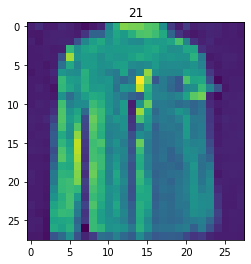

epoch:  22


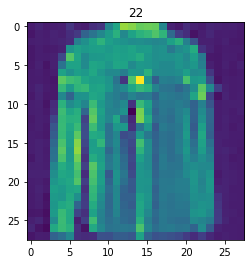

epoch:  23


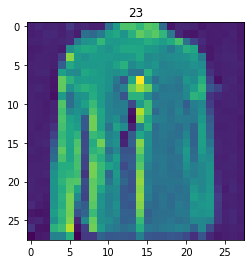

epoch:  24


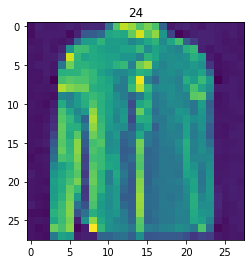

epoch:  25


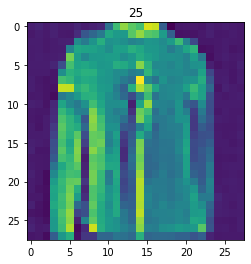

epoch:  26


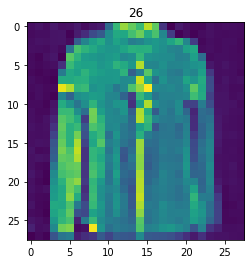

epoch:  27


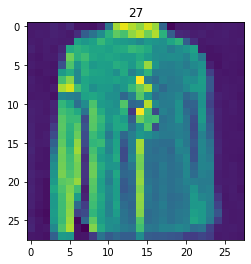

epoch:  28


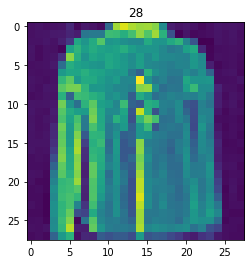

epoch:  29


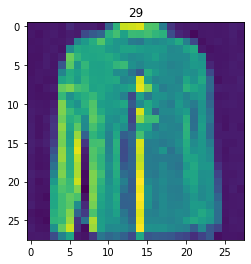

epoch:  30


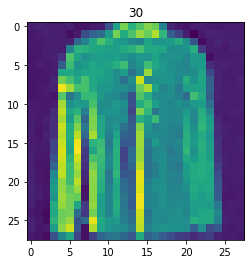

epoch:  31


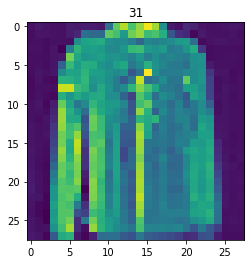

epoch:  32


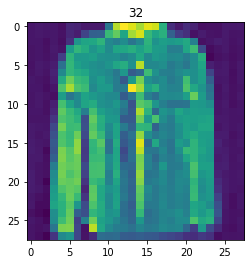

epoch:  33


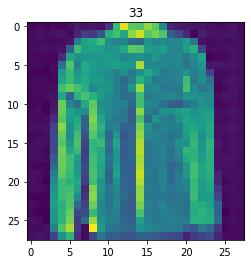

epoch:  34


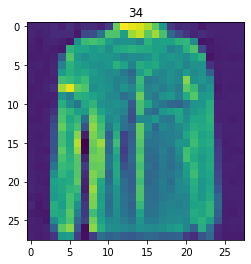

epoch:  35


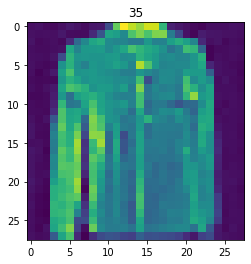

epoch:  36


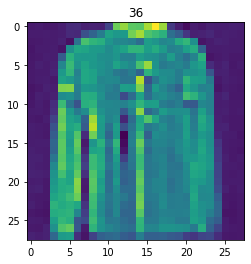

epoch:  37


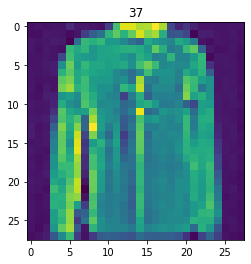

epoch:  38


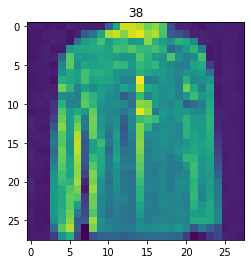

epoch:  39


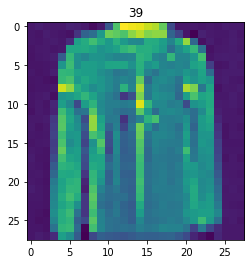

epoch:  40


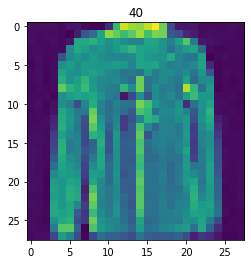

epoch:  41


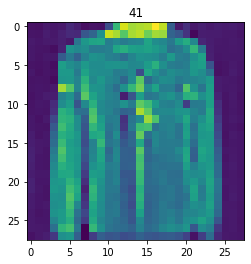

epoch:  42


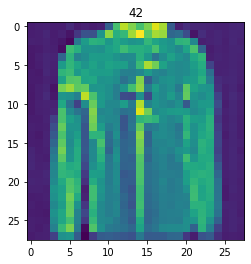

epoch:  43


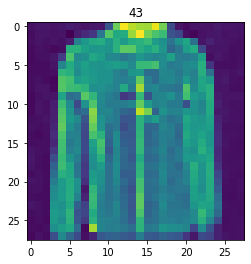

epoch:  44


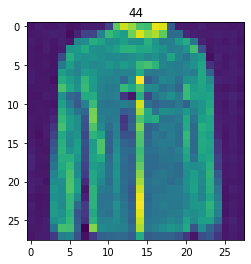

epoch:  45


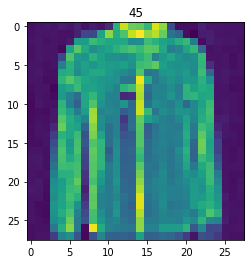

epoch:  46


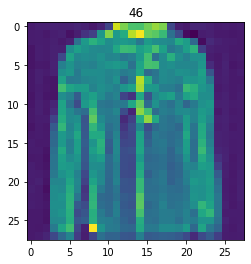

epoch:  47


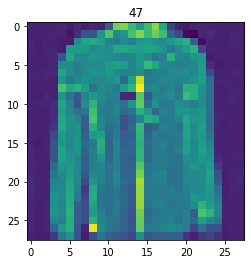

epoch:  48


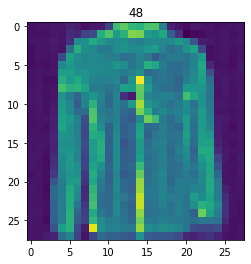

epoch:  49


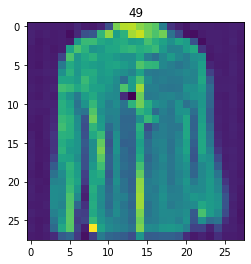

In [16]:
n_epoch = 50
seed = tf.random.normal([batch_size, noise_dim])

generator, discriminator = dcgan.layers
for epoch in range(n_epoch):
  print('epoch: ', epoch)  
  for batch in dataset:
    # 1단계 - Discriminator 훈련
    noise = tf.random.normal(shape = [batch_size, noise_dim])
    generated_image = generator(noise)        
    x_fake_and_real = tf.concat([generated_image, batch], axis=0)
    y1=tf.constant([[0.]]*batch_size+[[1.]]*batch_size)
    discriminator.trainable = True
    discriminator.train_on_batch(x_fake_and_real, y1)

    # 2단계 - Generagtor 훈련
    noise = tf.random.normal(shape=[batch_size, noise_dim])
    y2=tf.constant([[1.]]*batch_size)
    discriminator.trainable=False
    dcgan.train_on_batch(noise, y2)
    
  #epoch마다 생성된 이미지 1개 출력
  img = generator.predict(seed)
  plt.imshow(img[0,:,:,0])
  plt.title(epoch)
  plt.show()

In [22]:
tf.constant([[0.]]*batch_size+[[1.]]*batch_size)

<tf.Tensor: shape=(64, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
seed2 = tf.random.normal([batch_size, noise_dim])

In [19]:

imgs=generator.predict(seed2)

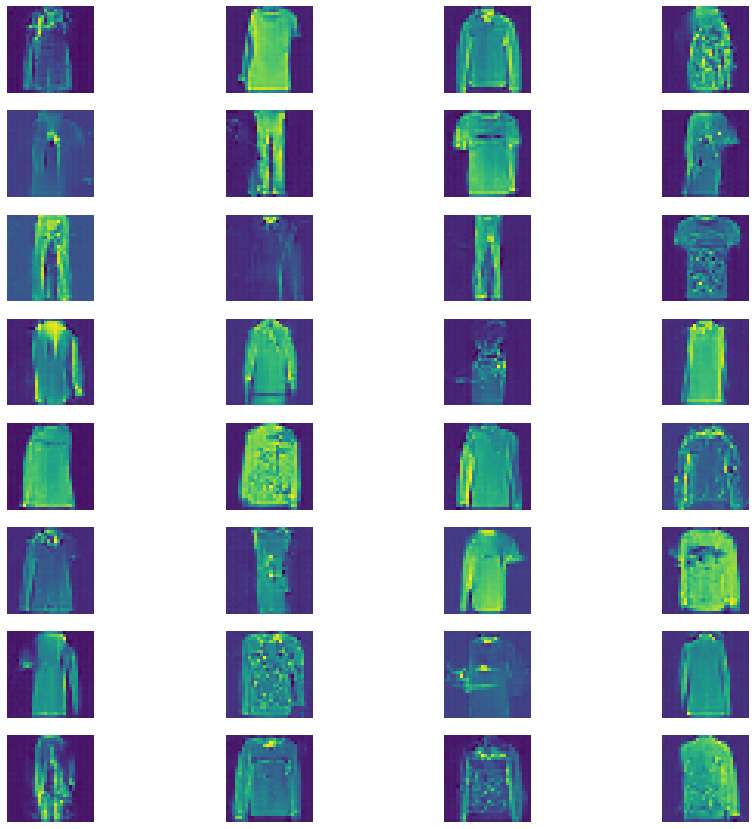

In [21]:
fig = plt.figure(figsize=(15,15))

for i in range(imgs.shape[0]):
    plt.subplot(8, 4, i+1)
    plt.imshow(imgs[i, :, :, 0])
    plt.axis('off')